In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import gradio as gr
from pandas.api.types import is_numeric_dtype
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings("ignore")

# Data Analysis

In [3]:
ps = pd.read_excel("Heart Disease.xlsx")

In [4]:
ps.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [5]:
ps.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [6]:
ps.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth        int64
MentalHealth          int64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime             int64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [7]:
ps.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [8]:
ps.mode()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,26.63,No,No,No,0,0,No,Female,65-69,White,No,Yes,Very good,7,No,No,No


In [9]:
ps.shape

(319795, 18)

In [10]:
categorical_cols = [col for col, dtype in ps.dtypes.items() if dtype == 'object']
categorical_cols

['HeartDisease',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

In [11]:
def printUnique(columns: list):
    unique_values = {col: list(ps[col].unique()) for col in columns}
    for col, values in unique_values.items():
        print(f"{col}: {values}")
printUnique(categorical_cols) 

HeartDisease: ['No', 'Yes']
Smoking: ['Yes', 'No']
AlcoholDrinking: ['No', 'Yes']
Stroke: ['No', 'Yes']
DiffWalking: ['No', 'Yes']
Sex: ['Female', 'Male']
AgeCategory: ['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74', '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29']
Race: ['White', 'Black', 'Asian', 'American Indian/Alaskan Native', 'Other', 'Hispanic']
Diabetic: ['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)']
PhysicalActivity: ['Yes', 'No']
GenHealth: ['Very good', 'Fair', 'Good', 'Poor', 'Excellent']
Asthma: ['Yes', 'No']
KidneyDisease: ['No', 'Yes']
SkinCancer: ['Yes', 'No']


# Encoding

In [12]:
ps1 = ps.copy()
ps2 = ps.copy()
ps3 = ps.copy()
ps4 = ps.copy()
ps5 = ps.copy()

Replace Method

In [13]:
ps1.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [14]:
ps1.HeartDisease = ps1.HeartDisease.replace(['No', 'Yes'],[0,1])
ps1.Smoking = ps1.Smoking.replace(['Yes', 'No'],[1,0])
ps1.AlcoholDrinking = ps1.AlcoholDrinking.replace(['No', 'Yes'],[0,1])
ps1.Stroke = ps1.Stroke.replace(['No', 'Yes'],[0,1])
ps1.DiffWalking = ps1.DiffWalking.replace(['No', 'Yes'],[0,1])
ps1.Sex = ps1.Sex.replace(['Female', 'Male'],[0,1])
ps1.AgeCategory = ps1.AgeCategory.replace(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74', '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],[7,12,9,11,4,10,8,6,5,0,3,2,1])
ps1.Race = ps1.Race.replace(['White', 'Black', 'Asian', 'American Indian/Alaskan Native', 'Other', 'Hispanic'],[0,1,2,3,4,5])
ps1.Diabetic = ps1.Diabetic.replace(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],[1,0,3,2])
ps1.PhysicalActivity = ps1.PhysicalActivity.replace(['Yes', 'No'],[1,0])
ps1.GenHealth = ps1.GenHealth.replace(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'],[3,1,2,0,4])
ps1.Asthma = ps1.Asthma.replace(['Yes', 'No'],[1,0])
ps1.KidneyDisease = ps1.KidneyDisease.replace(['No', 'Yes'],[0,1])
ps1.SkinCancer = ps1.SkinCancer.replace(['Yes', 'No'],[1,0])

In [15]:
ps1.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,7,0,1,1,3,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,12,0,0,1,3,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,9,0,1,1,1,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,11,0,0,0,2,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,4,0,0,1,3,8,0,0,0
5,1,28.87,1,0,0,6,0,1,0,11,1,0,0,1,12,0,0,0
6,0,21.63,0,0,0,15,0,0,0,10,0,0,1,1,4,1,0,1
7,0,31.64,1,0,0,5,0,1,0,12,0,1,0,2,9,1,0,0
8,0,26.45,0,0,0,0,0,0,0,12,0,3,0,1,5,0,1,0
9,0,40.69,0,0,0,0,0,1,1,9,0,0,1,2,10,0,0,0


# Correlation

In [16]:
ps1.corr()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
HeartDisease,1.000000,0.051803,0.107764,-0.032080,0.196835,0.170721,0.028591,0.201258,0.070040,0.233432,-0.039285,0.118281,-0.100030,-0.243182,0.008327,0.041444,0.145197,0.093317
BMI,0.051803,1.000000,0.023118,-0.038816,0.019733,0.109788,0.064131,0.181678,0.026940,-0.004744,0.030883,0.163437,-0.150616,-0.230720,-0.051822,0.092345,0.050768,-0.033644
Smoking,0.107764,0.023118,1.000000,0.111768,0.061226,0.115352,0.085157,0.120074,0.085052,0.128331,-0.061821,0.038993,-0.097174,-0.174717,-0.030336,0.024149,0.034920,0.033977
AlcoholDrinking,-0.032080,-0.038816,0.111768,1.000000,-0.019858,-0.017254,0.051282,-0.035328,0.004200,-0.059528,-0.021080,-0.042695,0.017487,0.029780,-0.005065,-0.002202,-0.028280,-0.005702
Stroke,0.196835,0.019733,0.061226,-0.019858,1.000000,0.137014,0.046467,0.174143,-0.003091,0.137822,-0.016025,0.072476,-0.079455,-0.168090,0.011900,0.038866,0.091167,0.048116
PhysicalHealth,0.170721,0.109788,0.115352,-0.017254,0.137014,1.000000,0.287987,0.428373,-0.040904,0.110763,0.002861,0.111644,-0.232283,-0.482697,-0.061387,0.117907,0.142197,0.041700
MentalHealth,0.028591,0.064131,0.085157,0.051282,0.046467,0.287987,1.000000,0.152235,-0.100058,-0.155506,0.026097,0.029970,-0.095808,-0.241625,-0.119717,0.114008,0.037281,-0.033412
DiffWalking,0.201258,0.181678,0.120074,-0.035328,0.174143,0.428373,0.152235,1.000000,-0.068860,0.243263,0.001444,0.152876,-0.278524,-0.413797,-0.022216,0.103222,0.153064,0.064840
Sex,0.070040,0.026940,0.085052,0.004200,-0.003091,-0.040904,-0.100058,-0.068860,1.000000,-0.067478,-0.003377,-0.018350,0.048247,0.025947,-0.015704,-0.069191,-0.009084,0.013434
AgeCategory,0.233432,-0.004744,0.128331,-0.059528,0.137822,0.110763,-0.155506,0.243263,-0.067478,1.000000,-0.201606,0.154034,-0.121687,-0.188381,0.104953,-0.058108,0.123190,0.263537


<Axes: >

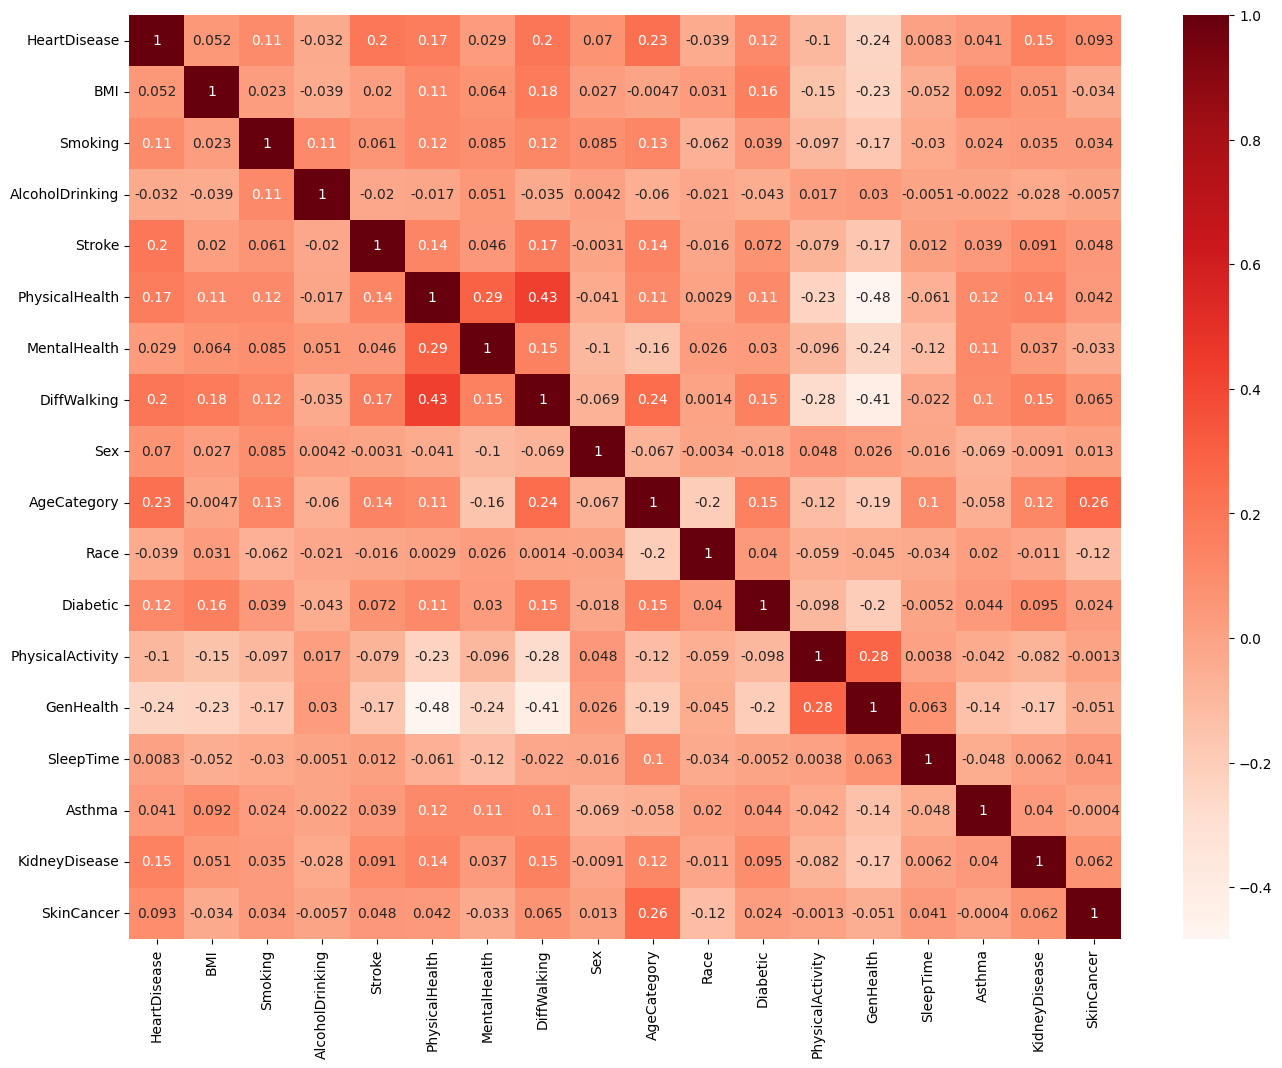

In [17]:
plt.figure(figsize=(16,12))
sb.heatmap(ps1.corr(), annot=True, cmap="Reds")

# Label Encoding

In [18]:
ps2.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [19]:
le = LabelEncoder()

In [20]:
for col in ps2.columns:
    if (not is_numeric_dtype(ps2[col])):
        ps2[col] = le.fit_transform(ps2[col])

In [21]:
ps2.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,7,5,2,1,4,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,12,5,0,1,4,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,9,5,2,1,1,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,11,5,0,0,2,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,4,5,0,1,4,8,0,0,0


# Ordinal Encoder

In [22]:
ps3.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [23]:
oe = OrdinalEncoder()

In [24]:
for col in ps3.columns:
    if (not is_numeric_dtype(ps3[col])):
        ps3[col] = le.fit_transform(ps3[col])

In [25]:
ps3.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,7,5,2,1,4,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,12,5,0,1,4,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,9,5,2,1,1,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,11,5,0,0,2,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,4,5,0,1,4,8,0,0,0


# One Hot Encoding / Dummy Variable Encoder

In [26]:
ps4.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [27]:
for col in ps4.columns:
    if (not is_numeric_dtype(ps4[col])):
        dummy = pd.get_dummies(ps4[col], drop_first=True, dtype=int, prefix=col)
        ps4 = pd.concat([ps4,dummy],axis=1).drop(col,axis=1)

In [28]:
ps4.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,16.60,3,30,5,0,1,0,0,0,0,...,1,0,1,0,0,0,1,1,0,1
1,20.34,0,0,7,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,26.58,20,30,8,0,1,0,0,0,1,...,1,0,1,1,0,0,0,1,0,0
3,24.21,0,0,6,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,23.71,28,0,8,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0


Re-Edit

In [29]:
binary = [col for col in categorical_cols if ps5[col].nunique() is 2]
printUnique(binary)

HeartDisease: ['No', 'Yes']
Smoking: ['Yes', 'No']
AlcoholDrinking: ['No', 'Yes']
Stroke: ['No', 'Yes']
DiffWalking: ['No', 'Yes']
Sex: ['Female', 'Male']
PhysicalActivity: ['Yes', 'No']
Asthma: ['Yes', 'No']
KidneyDisease: ['No', 'Yes']
SkinCancer: ['Yes', 'No']


In [30]:
ps1[binary] = oe.fit_transform(ps1[binary])
ps1[binary].head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [31]:
p = ps1.drop('HeartDisease', axis=1)
s = ps1.HeartDisease

In [32]:
p.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,1.0,0.0,0.0,3,30,0.0,0.0,7,0,1,1.0,3,5,1.0,0.0,1.0
1,20.34,0.0,0.0,1.0,0,0,0.0,0.0,12,0,0,1.0,3,7,0.0,0.0,0.0
2,26.58,1.0,0.0,0.0,20,30,0.0,1.0,9,0,1,1.0,1,8,1.0,0.0,0.0
3,24.21,0.0,0.0,0.0,0,0,0.0,0.0,11,0,0,0.0,2,6,0.0,0.0,1.0
4,23.71,0.0,0.0,0.0,28,0,1.0,0.0,4,0,0,1.0,3,8,0.0,0.0,0.0


In [33]:
s.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: HeartDisease, dtype: float64

In [34]:
ps1.duplicated().sum()

18078

In [35]:
ps1.drop_duplicates(inplace=True)

# Resampling

In [36]:
ros = RandomOverSampler(random_state=47)

In [37]:
p_new, s_new =ros.fit_resample(p,s)

In [38]:
s_new.value_counts()

HeartDisease
0.0    292422
1.0    292422
Name: count, dtype: int64

# Decision Tree Classifier

In [39]:
ptrain, ptest, strain, stest = tts(p_new, s_new, test_size=0.3, random_state=45)

In [40]:
dtc = DecisionTreeClassifier()

In [41]:
dtc.fit(ptrain, strain)

DecisionTreeClassifier()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [42]:
dtc_pred = dtc.predict(ptest)

In [43]:
dtc_score = dtc.score(ptest,stest)
dtc_score

0.9502319696330662

In [44]:
classification_report(stest,dtc_pred)

'              precision    recall  f1-score   support\n\n         0.0       1.00      0.90      0.95     87425\n         1.0       0.91      1.00      0.95     88029\n\n    accuracy                           0.95    175454\n   macro avg       0.95      0.95      0.95    175454\nweighted avg       0.95      0.95      0.95    175454\n'

In [45]:
dtc_cm = confusion_matrix(stest, dtc_pred)

Text(0.5, 1.0, 'Decision Tree Confusion Matrix')

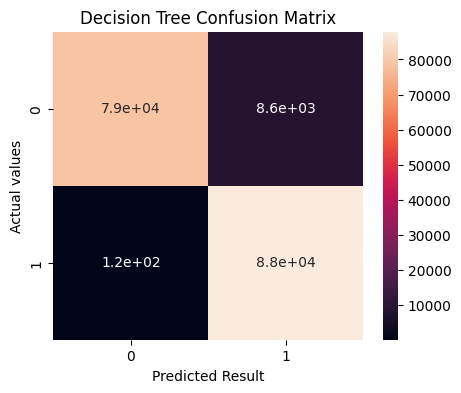

In [46]:
plt.figure(figsize=(5,4))
sb.heatmap(dtc_cm, annot=True)
plt.xlabel('Predicted Result')
plt.ylabel('Actual values')
plt.title("Decision Tree Confusion Matrix")

# K-nearest neighbor(KNN) Classifier

In [47]:
knnc = KNeighborsClassifier()

In [48]:
knnc.fit(ptrain,strain)

KNeighborsClassifier()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. 
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [49]:
knnc_pred = knnc.predict(ptest)

In [50]:
knnc_score = knnc.score(ptest,stest)
knnc_score

0.889270122083281

In [51]:
classification_report(stest,knnc_pred)

'              precision    recall  f1-score   support\n\n         0.0       0.99      0.79      0.88     87425\n         1.0       0.82      0.99      0.90     88029\n\n    accuracy                           0.89    175454\n   macro avg       0.91      0.89      0.89    175454\nweighted avg       0.91      0.89      0.89    175454\n'

In [52]:
knnc_cm = confusion_matrix(stest, knnc_pred)

Text(0.5, 1.0, 'K-nearest neighbor(KNN) Confusion Matrix')

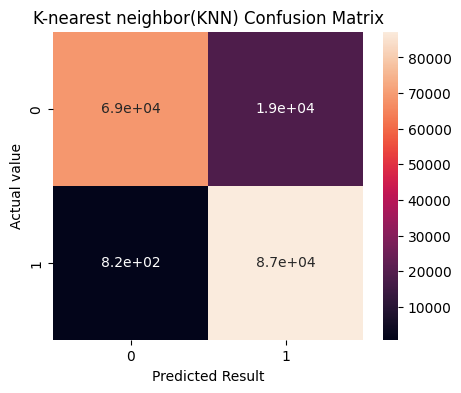

In [53]:
plt.figure(figsize=(5,4))
sb.heatmap(knnc_cm, annot=True)
plt.xlabel('Predicted Result')
plt.ylabel('Actual value')
plt.title("K-nearest neighbor(KNN) Confusion Matrix")

# Random Forest Classifier

In [54]:
rfc = RandomForestClassifier()

In [55]:
rfc.fit(ptrain,strain)

RandomForestClassifier()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. 
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [56]:
rfc_pred = rfc.predict(ptest)

In [57]:
rfc_score = rfc.score(ptest,stest)
rfc_score

0.9645662110866666

In [58]:
classification_report(stest,rfc_pred)

'              precision    recall  f1-score   support\n\n         0.0       1.00      0.93      0.96     87425\n         1.0       0.93      1.00      0.97     88029\n\n    accuracy                           0.96    175454\n   macro avg       0.97      0.96      0.96    175454\nweighted avg       0.97      0.96      0.96    175454\n'

In [59]:
rfc_cm = confusion_matrix(stest, rfc_pred)

Text(0.5, 1.0, 'Random Forest Confusion Matrix')

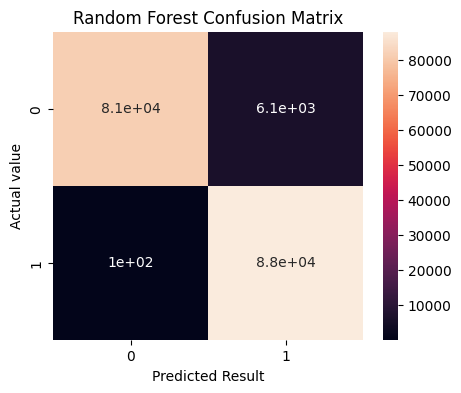

In [60]:
plt.figure(figsize=(5,4))
sb.heatmap(rfc_cm, annot=True)
plt.xlabel('Predicted Result')
plt.ylabel('Actual value')
plt.title("Random Forest Confusion Matrix")

# Logistic Regression

In [61]:
lr = LogisticRegression()

In [62]:
lr.fit(ptrain,strain)

LogisticRegression()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. 
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [63]:
lr_pred = lr.predict(ptest)

In [64]:
lr_score = lr.score(ptest,stest)
lr_score

0.7618008138885406

In [65]:
classification_report(stest,lr_pred)

'              precision    recall  f1-score   support\n\n         0.0       0.77      0.75      0.76     87425\n         1.0       0.76      0.78      0.77     88029\n\n    accuracy                           0.76    175454\n   macro avg       0.76      0.76      0.76    175454\nweighted avg       0.76      0.76      0.76    175454\n'

In [66]:
lr_cm = confusion_matrix(stest, lr_pred)

Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

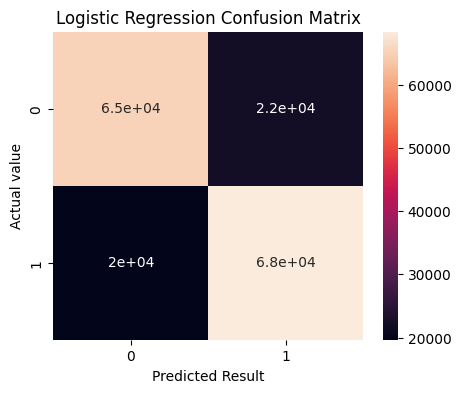

In [67]:
plt.figure(figsize=(5,4))
sb.heatmap(lr_cm, annot=True)
plt.xlabel('Predicted Result')
plt.ylabel('Actual value')
plt.title("Logistic Regression Confusion Matrix")

# Accuracy Score Comparsion

In [68]:
ps_new = pd.DataFrame({'Models':['Decision Tree','KNN classification','Random forest','Logistic Regression'],
       'Accuracy': [dtc_score,knnc_score,rfc_score,lr_score]})
ps_new.head()

,Models,Accuracy
0,Decision Tree,0.950232
1,KNN classification,0.889270
2,Random forest,0.964566
3,Logistic Regression,0.761801


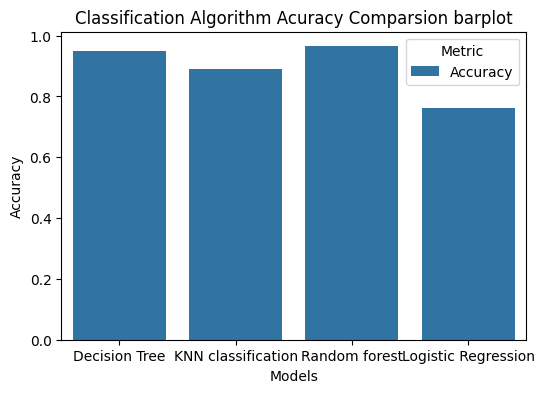

In [69]:
plt.figure(figsize=(6,4))
data_bar = ps_new.melt('Models', var_name='Metric', value_name='Value')
sb.barplot(x='Models', y='Value', hue='Metric', data=data_bar)
plt.title('Classification Algorithm Acuracy Comparsion barplot')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

# Cross Validation Random Forest

# Stratified K Fold

In [72]:
stkf = StratifiedKFold(n_splits=6)
rfc_score = cross_val_score(rfc,p_new,s_new,cv=stkf)
rfc_score_mean = rfc_score.mean()
rfc_score_mean

0.9701988906443427

# K-Fold

In [74]:
kf = KFold(n_splits=6)
rfc_score = cross_val_score(rfc,p_new,s_new,cv=kf)
rfc_score_mean = rfc_score.mean()
rfc_score_mean

0.9641528339181047

# Gradio Deployment

In [73]:
ps.head(20)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No
5,Yes,28.87,Yes,No,No,6,0,Yes,Female,75-79,Black,No,No,Fair,12,No,No,No
6,No,21.63,No,No,No,15,0,No,Female,70-74,White,No,Yes,Fair,4,Yes,No,Yes
7,No,31.64,Yes,No,No,5,0,Yes,Female,80 or older,White,Yes,No,Good,9,Yes,No,No
8,No,26.45,No,No,No,0,0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5,No,Yes,No
9,No,40.69,No,No,No,0,0,Yes,Male,65-69,White,No,Yes,Good,10,No,No,No


In [75]:
def predict_HeartDisease(bmi,smoking,alcohol_drinking,stroke,physical_health,mental_health,walking,sex,age,race,diabetic,activity,gen_health,sleep,asthma,kidney,skin):
    input_data = pd.DataFrame({
        "BMI": [bmi],
        "Smoking": [smoking],
        "AlcoholDrinking": [alcohol_drinking],
        "Stroke": [stroke],
        "PhysicalHealth": [physical_health],
        "MentalHealth": [mental_health],
        "DiffWalking": [walking],
        "Sex": [sex],
        "AgeCategory": [age],
        "Race": [race],
        "Diabetic": [diabetic],
        "PhysicalActivity": [activity],
        "GenHealth": [gen_health],
        "SleepTime": [sleep],
        "Asthma": [asthma],
        "KidneyDisease": [kidney],
        "SkinCancer": [skin]
    })
    
    HeartDisease_prediction = rfc.predict(input_data)
    message = 'Congratulations! No Heart Disease' if HeartDisease_prediction==0 else 'Unfortunately, Heart Disease'
    flag = 'negative' if HeartDisease_prediction==0 else 'positive'
    html = f"<h2 align='center' class='{flag}'>{message}</h2>"

    return HeartDisease_prediction[0]
    
inputs = [
    gr.inputs.Number(label="BMI"),
    gr.inputs.Number(label="Smoking"),
    gr.inputs.Number(label="AlcoholDrinking"),
    gr.inputs.Number(label="Stroke"),
    gr.inputs.Number(label="PhysicalHealth"),
    gr.inputs.Number(label="MentalHealth"),
    gr.inputs.Number(label="DiffWalking"),
    gr.inputs.Number(label="Sex"),
    gr.inputs.Number(label="AgeCategory"),
    gr.inputs.Number(label="Race"),
    gr.inputs.Number(label="Diabetic"),
    gr.inputs.Number(label="PhysicalActivity"),
    gr.inputs.Number(label="GenHealth"),
    gr.inputs.Number(label="SleepTime"),
    gr.inputs.Number(label="Asthma"),
    gr.inputs.Number(label="KidneyDisease"),
    gr.inputs.Number(label="SkinCancer")
 ]
output = gr.outputs.Textbox(label="Heart Disease Prediction")
gr.Interface(fn=predict_HeartDisease, inputs=inputs, outputs=output, title="Heart Disease Predicator").launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
